In [2]:
import pandas as pd

C:\Users\sh_su\AppData\Local\Temp\ipykernel_1124\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('mutant_variants.csv')

In [3]:
df['Rec'] = 'RHPHPHLSFMAIPPKK'

In [4]:
seq1 = 'QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQKPVALINNQFLPYPYYAKPAAVRSPAQILQWQVLSNTVPAKSCQAQPTTMARHPHPHLSFMAIPPKKNQDKTEIPTINTIASGEPTSTPTTEAVESTVATLEDSPEVIESPPEINTVQVTSTAV'

In [5]:
len(seq1)

169

In [6]:
df['Receptor'] = seq1

In [7]:
df

,Mutant,Rec,Receptor
0,LFDTGSSAAAATIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...
1,LFDTGSSAAACTIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...
2,LFDTGSSAAADTIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...
3,LFDTGSSAAAETIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...
4,LFDTGSSAAAFTIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...
...,...,...,...
159994,LFDTGSSYYYSTIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...
159995,LFDTGSSYYYTTIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...
159996,LFDTGSSYYYVTIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...
159997,LFDTGSSYYYWTIDTGTNFFI,RHPHPHLSFMAIPPKK,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...


In [2]:
import urllib3
from DeepPurpose import PPI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
from DeepPurpose import utils, dataset
import matplotlib.pyplot as plt

In [9]:
df['Value'] = 1

In [10]:
df = df.drop_duplicates(subset=['Mutant'])

In [11]:
df.shape

(159999, 4)

In [12]:

target_encoding = 'Conjoint_triad'
pred = data_process(X_target = df['Receptor'], X_target_ = df['Mutant'], y = df['Value'], 
			    target_encoding = target_encoding,
			    split_method='no_split')

Protein Protein Interaction Prediction Mode...
in total: 159999 protein-protein pairs
encoding protein...
unique target sequence: 1
encoding protein...
unique target sequence: 159999


In [14]:
import pickle

filename = 'xgb_pro_pep.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [14]:
pred['combined'] = pred.apply(lambda x: [x['Label']] + list(x['target_encoding_1']) + list(x['target_encoding_2']), axis=1)

combined = np.array(pred['combined'].tolist())
combined.shape

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Extracting the first column as y variable
y = combined[:, 0]

# Extracting the rest of the columns as feature set X
X = combined[:, 1:]

In [17]:
X_clean[0]

array([3, 5, 1, 0, 0, 3, 0, 0, 5, 4, 3, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 3,
       1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 2, 2, 3, 0, 1, 0, 6, 4, 2, 4, 2, 1, 1, 4, 2, 2,
       1, 0, 1, 2, 2, 2, 2, 1, 0, 3, 0, 2, 2, 0, 0, 2, 2, 0, 0, 3, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 3,
       1, 0, 1, 2, 6, 3, 1, 3, 0, 0, 2, 3, 1, 1, 2, 0, 0, 1, 0, 1, 3, 0,
       1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 3, 1, 0, 0, 2, 0,
       2, 3, 2, 0, 0, 2, 0, 1, 0, 4, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 0, 0, 5, 1, 3, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 3, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [15]:
iso_forest = IsolationForest(contamination=0.15, random_state=42)  # Adjust contamination rate as needed
outliers = iso_forest.fit_predict(combined)

# Step 2: Identify and remove outliers
mask = outliers != -1
X_clean = X[mask]

In [16]:
y_pred = loaded_model.predict(X_clean)

In [18]:
pred['out'] = outliers

In [19]:
pred2 = pred[pred['out']!=-1]

In [20]:
pred2['predicted_value'] = y_pred

C:\Users\sh_su\AppData\Local\Temp\ipykernel_14096\2843546387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred2['predicted_value'] = y_pred


In [28]:
[pred2['target_encoding_2'][3]==pred2['target_encoding_2'][4]]

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [21]:
pred2

,Target Sequence 1,Target Sequence 2,Label,target_encoding_1,target_encoding_2,combined,out,predicted_value
0,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSAAAATIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-6.194485
5,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSAAAGTIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-6.194485
6,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSAAAHTIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-6.468835
11,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSAAANTIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-6.468835
13,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSAAAQTIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-6.468835
...,...,...,...,...,...,...,...,...
159994,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSYYYSTIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-5.720610
159995,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSYYYTTIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-5.720610
159996,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSYYYVTIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-5.291433
159997,QEQNQEQPIRCEKDERFFSDKIAKYIPIQYVLSRYPSYGLNYYQQK...,LFDTGSSYYYWTIDTGTNFFI,1,"[1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, ...",1,-5.957017


In [22]:
pred2.to_csv('predicted_set.csv', index=False)

In [32]:
pred2_clean = pred2

In [34]:
pred2_clean = pred2_clean.drop(columns=['target_encoding_1', 'target_encoding_2', 'combined', 'out'])

In [36]:
pred2_clean.to_csv('predicted_2nd_set2.csv', index=False)

In [13]:
y_pred = loaded_model.predict(X_clean)

In [2]:
import pickle

filename = 'xgb_pro_pep.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [66]:
y_pred = loaded_model.predict(X_clean)

In [67]:
pred2_clean['predicted_value10'] = y_pred
pred2_clean.to_csv('predicted_2nd_set2.csv', index=False)

In [2]:
df = pd.read_csv('predicted_2nd_set2.csv')

In [8]:
df = pd.read_csv('mut_set2.csv')

In [9]:
df['Rec'] = 'RHPHPHLSFMAIPPKK'
df['Value'] = 1

In [10]:
target_encoding = 'Conjoint_triad'
pred = data_process(X_target = df['Rec'], X_target_ = df['Mutant'], y = df['Value'], 
			    target_encoding = target_encoding,
			    split_method='no_split')

Protein Protein Interaction Prediction Mode...
in total: 4140 protein-protein pairs
encoding protein...
unique target sequence: 1
encoding protein...
unique target sequence: 4002


In [11]:
pred['combined'] = pred.apply(lambda x: [x['Label']] + list(x['target_encoding_1']) + list(x['target_encoding_2']), axis=1)

combined = np.array(pred['combined'].tolist())
combined.shape

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Extracting the first column as y variable
y = combined[:, 0]

# Extracting the rest of the columns as feature set X
X = combined[:, 1:]

In [12]:
iso_forest = IsolationForest(contamination=0.15, random_state=42)  # Adjust contamination rate as needed
outliers = iso_forest.fit_predict(combined)

# Step 2: Identify and remove outliers
mask = outliers != -1
X_clean = X[mask]

In [15]:
y_pred = loaded_model.predict(X_clean)

In [16]:
pred['out'] = outliers

In [17]:
pred2 = pred[pred['out']!=-1]

In [18]:
pred2['predicted_value'] = y_pred

C:\Users\sh_su\AppData\Local\Temp\ipykernel_7248\2843546387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred2['predicted_value'] = y_pred


In [21]:
pred2_clean = pred2.drop(columns=['target_encoding_1', 'target_encoding_2', 'combined', 'out'])

In [22]:
pred2_clean

,Target Sequence 1,Target Sequence 2,Label,predicted_value
0,RHPHPHLSFMAIPPKK,LADTGSSADESTIDTGTNFFI,1,2.029389
1,RHPHPHLSFMAIPPKK,LCDTGSSADESTIDTGTNFFI,1,2.230910
2,RHPHPHLSFMAIPPKK,LDDTGSSADESTIDTGTNFFI,1,2.186326
3,RHPHPHLSFMAIPPKK,LEDTGSSADESTIDTGTNFFI,1,2.186326
4,RHPHPHLSFMAIPPKK,LFDTGSSADESTIDTGTNFFI,1,2.230910
...,...,...,...,...
4119,RHPHPHLSFMAIPPKK,LFDTGSSYVYVTYDTGTNFFI,1,3.014089
4124,RHPHPHLSFMAIPPKK,LFDTGSSYVYVTIDTGTNFFI,1,3.684984
4127,RHPHPHLSFMAIPPKK,LFDTGSSYVYVTIDTGTNFII,1,3.684984
4129,RHPHPHLSFMAIPPKK,LFDTGSSYVYVTIDTGTNFLI,1,3.684984


In [3]:
df_new = pd.read_csv('Shilan_results - Final_list.csv')

In [4]:
df_new['Rec'] = 'C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC(=O)C[C@@H]([C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](C(C)C)NC(=O)CC(C)C)O'

In [10]:
df_new['Value'] = 1

In [13]:
df_new

,Peptides,Sequence,Solubility,Rec,Value
0,pep1,LFDTGSSADDSTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1
1,pep2,LFDTGSSVEDTTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1
2,pep3,LFDTGSSGDEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1
3,pep4,LFDTGSSAEDYTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1
4,pep5,LFDTGSSAEESTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1
...,...,...,...,...,...
79,pep95,LFDTGSSGEETTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1
80,pep96,LFDTGSSADEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1
81,pep1,LFDTGSSVYYWTWDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1
82,pep2,LFDTGSSNYYWTWDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1


In [6]:
from DeepPurpose import utils, dataset
from DeepPurpose import DTI as models
import warnings
warnings.filterwarnings("ignore")

In [7]:
from DeepPurpose import DTI as models 
from DeepPurpose import utils, dataset

In [8]:
path = utils.download_pretrained_model('Morgan_CNN_BindingDB_IC50')
net = models.model_pretrained(path_dir = path)

pretrained model Successfully Downloaded...


In [9]:
drug_encoding = 'Morgan'
target_encoding = 'CNN'

In [12]:
X_drug = df_new['Rec']
X_target = df_new['Sequence']
y = df_new['Value']
X_pred = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')
y_pred = net.predict(X_pred)
print('The predicted score is ' + str(y_pred))

Drug Target Interaction Prediction Mode...
in total: 84 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 84
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
The predicted score is [5.298455715179443, 5.3007683753967285, 5.310979843139648, 5.256872177124023, 5.273190021514893, 5.300425052642822, 5.311209201812744, 5.275112152099609, 5.300425052642822, 5.281164169311523, 5.300425052642822, 5.297145366668701, 5.278183460235596, 5.294050216674805, 5.304572582244873, 5.301164627075195, 5.2906670570373535, 5.296595096588135, 5.3087029457092285, 5.27426290512085, 5.271060943603516, 5.293095111846924, 5.302156925201416, 5.300425052642822, 5.27396821975708, 5.293752193450928, 5.311154842376709, 5.301871299743652, 5.296871662139893, 5.293752193450928, 5.300425052642822, 5.275162696838379, 5.261630058288574, 5.311746120452881, 5.275631904602051, 5.325472831726074, 5.282284259796143, 5.287801742553711,

In [14]:
df_new['Pred'] = y_pred

In [15]:
df_new

,Peptides,Sequence,Solubility,Rec,Value,Pred
0,pep1,LFDTGSSADDSTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.298456
1,pep2,LFDTGSSVEDTTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.300768
2,pep3,LFDTGSSGDEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.310980
3,pep4,LFDTGSSAEDYTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.256872
4,pep5,LFDTGSSAEESTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.273190
...,...,...,...,...,...,...
79,pep95,LFDTGSSGEETTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.294339
80,pep96,LFDTGSSADEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.315047
81,pep1,LFDTGSSVYYWTWDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.290893
82,pep2,LFDTGSSNYYWTWDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.296640


In [16]:
df_new_pred = df_new.sort_values(by='Pred', ascending=False)

In [17]:
df_new_pred

,Peptides,Sequence,Solubility,Rec,Value,Pred
35,pep41,LFDTGSSVDEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.325473
56,pep65,LFDTGSSVDESTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.318731
80,pep96,LFDTGSSADEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.315047
39,pep45,LFDTGSSVDESTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.313759
71,pep83,LFDTGSSGDEYTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.312084
...,...,...,...,...,...,...
32,pep38,LFDTGSSGEESTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.261630
3,pep4,LFDTGSSAEDYTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.256872
45,pep51,LFDTGSSADDYTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.254373
43,pep49,LFDTGSSGDDSTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.250362


In [18]:
df_new_pred.reset_index(inplace=True)

In [19]:
import matplotlib.pyplot as plt

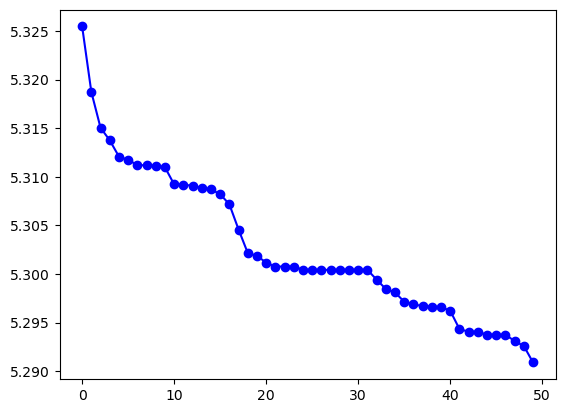

In [21]:
plt.plot(df_new_pred.head(50).index, df_new_pred['Pred'].head(50), marker='o', linestyle='-', color='b', label='Sales')

plt.show()

In [22]:
df_new_pred.head(17)

,index,Peptides,Sequence,Solubility,Rec,Value,Pred
0,35,pep41,LFDTGSSVDEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.325473
1,56,pep65,LFDTGSSVDESTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.318731
2,80,pep96,LFDTGSSADEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.315047
3,39,pep45,LFDTGSSVDESTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.313759
4,71,pep83,LFDTGSSGDEYTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.312084
5,33,pep39,LFDTGSSVDEYTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.311746
6,6,pep8,LFDTGSSGDETTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.311209
7,66,pep78,LFDTGSSVDETTKDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.311182
8,26,pep32,LFDTGSSGDESTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.311155
9,2,pep3,LFDTGSSGDEMTRDTGTNFFI,SOLUBLE,C[C@@H](C(=O)N[C@@H](CC(C)C)[C@H](CC(=O)O)O)NC...,1,5.310980


In [ ]:
df_new_pred